# 1. visualization 

In [7]:
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rand
%matplotlib

Using matplotlib backend: MacOSX


In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection = '3d')

In [9]:
xGrad = 5
yGrad = 7
noiseSD = 0.05

x=[]
y=[]
z=[]
for i in range(100):
    xItem = rand.randint(1,200)
    yItem = rand.randint(1,200)
    x.append(xItem)
    y.append(yItem)
    noise = np.random.normal(0,scale = 50.0)
    z.append((xItem*xGrad)+(yItem*yGrad)+noise)

In [10]:
ax.scatter(x,y,z, c='r', marker='o')
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')

fig.show()


# 2. PCA 

In [11]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [15]:
pca=PCA(3)  # 3 dimensions
projected = pca.fit_transform(digits.data)

In [16]:
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 3)


In [17]:
projected

array([[ -1.25946792,  21.27488758,  -9.46306595],
       [  7.95760935, -20.76869499,   4.43953372],
       [  6.99192501,  -9.95599068,   2.95854253],
       ...,
       [ 10.80128366,  -6.96025083,   5.59955338],
       [ -4.87209949,  12.42395603, -10.17093254],
       [ -0.34438751,   6.36554483,  10.77369126]])

In [18]:
x=projected[: , 0]
y=projected[: , 1]
z=projected[: , 2]

fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(111,projection = '3d')
ax2.scatter(x,y,z, c=digits.target, cmap=plt.cm.get_cmap('Spectral', 10))
ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_xlabel('Z')

fig2.show()



# 3. Choosing the number of components 

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

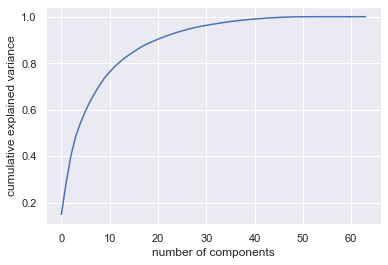

In [19]:
%matplotlib inline
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
np.cumsum(pca.explained_variance_ratio_)

# 4. PCA as noise filtering


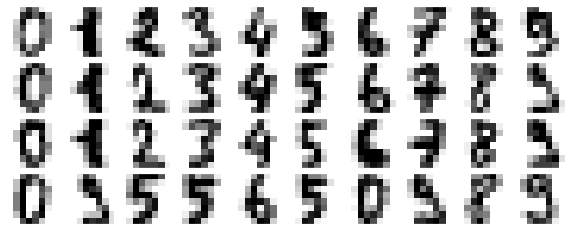

In [20]:
%matplotlib inline
def plot_digits(data):
        fig, axes = plt.subplots(4,10,figsize = (10,4), subplot_kw={'xticks':[], 'yticks':[]},
                                gridspec_kw=dict(hspace=0.1, wspace=0.1))
        for i, ax in enumerate(axes.flat):
            ax.imshow(data[i].reshape(8,8),
                     cmap = 'binary', interpolation='nearest', clim=(0,16))
plot_digits(digits.data)
        

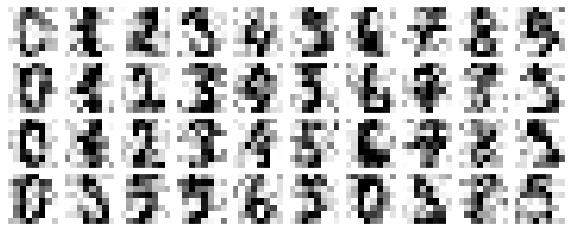

In [21]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [22]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

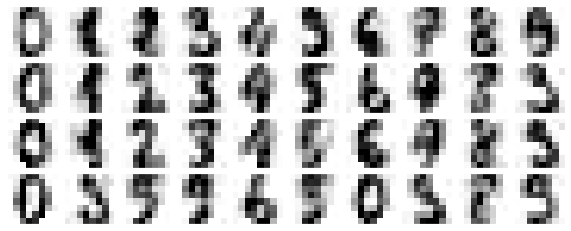

In [26]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Notes: reduce dimensions : PCA    reduce noise 